In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

files = ["memory_profile_sansa.dat", "memory_profile_mrf_0.dat", "memory_profile_mrf_0_5.dat"]

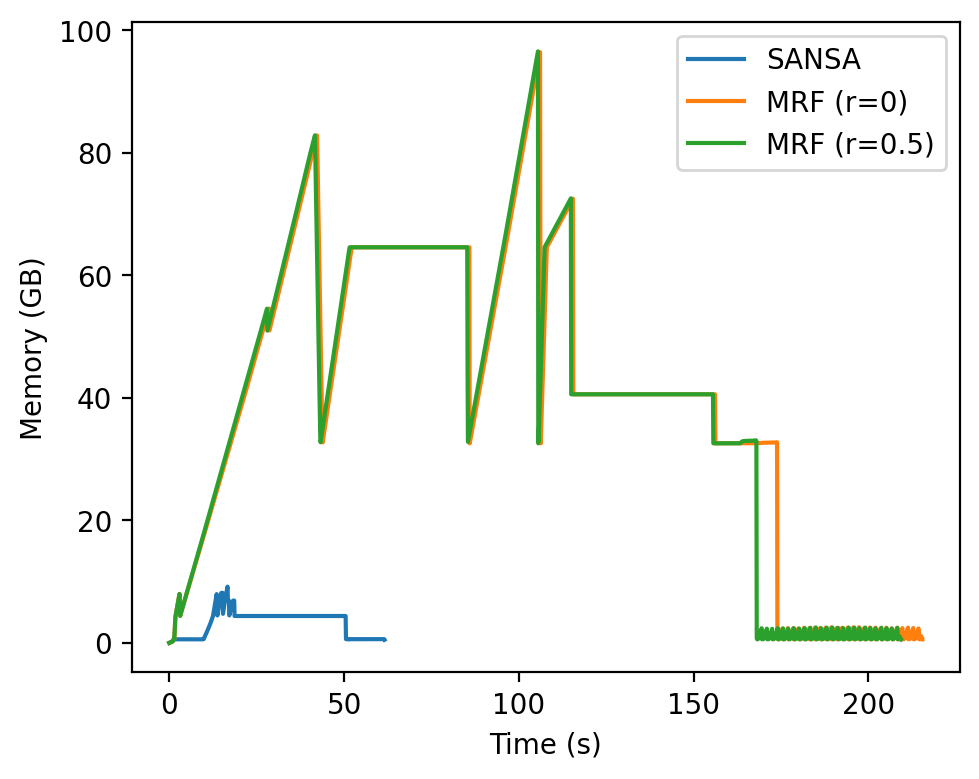

In [2]:
sansa_timestamps = []
sansa_times = []
sansa_mem = []
mrf_0_timestamps = []
mrf_0_times = []
mrf_0_mem = []
mrf_0_5_timestamps = []
mrf_0_5_times = []
mrf_0_5_mem = []

for filename in files:
    with open(filename, "r") as f:
        lines = f.readlines()[1:]
        start_time = float(lines[0].split()[2])
        for line in lines:
            _, mem, time = line.split()
            if filename == "memory_profile_sansa.dat":
                sansa_timestamps.append(float(time))
                sansa_times.append(float(time) - start_time)
                sansa_mem.append(float(mem) / 1e3)
            elif filename == "memory_profile_mrf_0.dat":
                mrf_0_timestamps.append(float(time))
                mrf_0_times.append(float(time) - start_time)
                mrf_0_mem.append(float(mem) / 1e3)
            elif filename == "memory_profile_mrf_0_5.dat":
                mrf_0_5_timestamps.append(float(time))
                mrf_0_5_times.append(float(time) - start_time)
                mrf_0_5_mem.append(float(mem) / 1e3)

plt.figure(figsize=(5, 4), dpi=200)
plt.plot(sansa_times, sansa_mem, label="SANSA")
plt.plot(mrf_0_times, mrf_0_mem, label="MRF (r=0)")
plt.plot(mrf_0_5_times, mrf_0_5_mem, label="MRF (r=0.5)")
plt.xlabel("Time (s)")
plt.ylabel("Memory (GB)")
plt.tight_layout()
plt.legend()

plt.savefig("memory_profile_graphs.png")

#### From console logs:

##### SANSA 
train start: 2023-05-08 11:40:19,612 = 1683546019.6

train end: 2023-05-08 11:41:08,986 = 1683546069.0

##### MRF 0 
train start: 2023-05-08 11:59:18,363 = 1683547158.4

train end: 2023-05-08 12:02:11,120 = 1683547331.1

##### MRF 0.5
train start: 2023-05-08 12:03:55,413 = 1683547435.4

train end: 2023-05-08 12:06:42,208 = 1683547602.2



In [3]:
sansa_train_start = 1683546019.6
sansa_train_end = 1683546069.0

mrf_0_train_start = 1683547158.4
mrf_0_train_end = 1683547331.1

mrf_0_5_train_start = 1683547435.4
mrf_0_5_train_end = 1683547602.2

sansa_train_index = [i for i, t in enumerate(sansa_timestamps) if sansa_train_start <= t <= sansa_train_end]
mrf_0_train_index = [i for i, t in enumerate(mrf_0_timestamps) if mrf_0_train_start <= t <= mrf_0_train_end]
mrf_0_5_train_index = [i for i, t in enumerate(mrf_0_5_timestamps) if mrf_0_5_train_start <= t <= mrf_0_5_train_end]

In [4]:
# max memory usage
print(max(sansa_mem))
print(max(mrf_0_mem))
print(max(mrf_0_5_mem))

9.177398438
96.446195312
96.58333984400001


In [5]:
# AVG mem during whole pipeline
print(sum(sansa_mem) / len(sansa_mem))
print(sum(mrf_0_mem) / len(mrf_0_mem))
print(sum(mrf_0_5_mem) / len(mrf_0_5_mem))

3.2167354928585663
39.60415699231402
39.86765961441212


In [6]:
# AVG mem during training
print(np.sum(np.array(sansa_mem)[sansa_train_index]) / len(np.array(sansa_mem)[sansa_train_index]))
print(np.sum(np.array(mrf_0_mem)[mrf_0_train_index]) / len(np.array(mrf_0_mem)[mrf_0_train_index]))
print(np.sum(np.array(mrf_0_5_mem)[mrf_0_5_train_index]) / len(np.array(mrf_0_5_mem)[mrf_0_5_train_index]))

3.8739077395638946
49.12393533831902
49.75035247972912


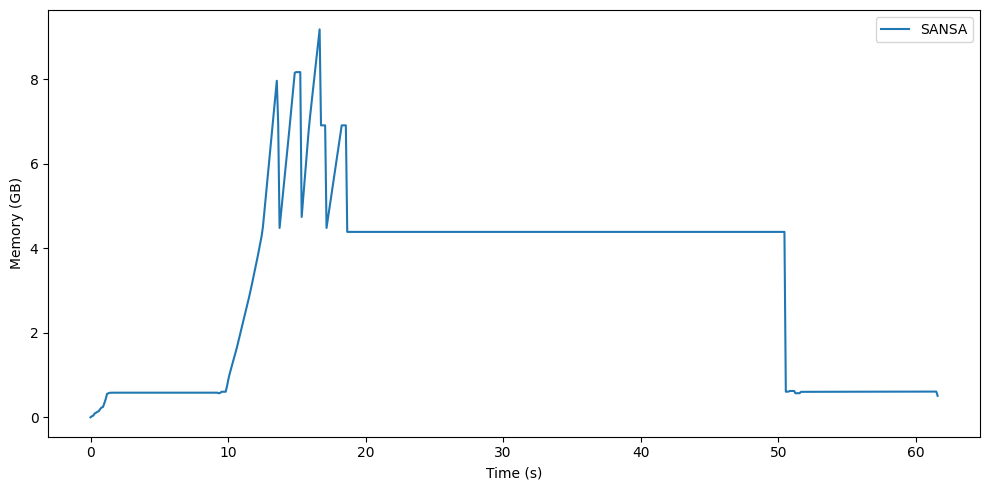

In [7]:
# Memory usage of SANSA

plt.figure(figsize=(10, 5))
plt.plot(sansa_times, sansa_mem, label="SANSA")
plt.xlabel("Time (s)")
plt.ylabel("Memory (GB)")
plt.legend()
plt.tight_layout()